In [1]:
from DidiDataset import DidiTrajectoryDataset
import sys
sys.path.append('../')
from DiffusionManager import DiffusionManager
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mean = [21599.4980, 104.0789535914567, 30.680879399098956]
std = [12470.9102, 0.0032705687484356773, 0.018204423046522103]
dataset = DidiTrajectoryDataset('E:/Data/Didi/chengdu/nov', traj_length=200, feature_mean=mean, feature_std=std)

In [2]:
mean = [21599.4980, 108.950773428688, 34.24354179925547]
std = [12470.9102, 0.02129110045580343, 0.019358855648211895]
dataset = DidiTrajectoryDataset('E:/Data/Didi/xian/nov', traj_length=200, feature_mean=mean, feature_std=std)

In [3]:
def visualizeTraj(lon_lat: torch.Tensor, times: torch.Tensor) -> None:
    """ draw trajectory

    :param lon_lat: lon_lat trajectory (2, traj_length)
    :param times: time of each point (traj_length)
    :return: None
    """
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.plot(lon_lat[0, :].cpu(), lon_lat[1, :].cpu(), color='#101010', linewidth=0.1)
    plt.scatter(lon_lat[0, :].cpu(), lon_lat[1, :].cpu(), c=times.cpu(), cmap='rainbow', s=0.5)

In [4]:
dataset.loadNextFiles(1)

Loading E:/Data/Didi/xian/nov\gps_20161101.pt


True

In [ ]:
dataset[0]

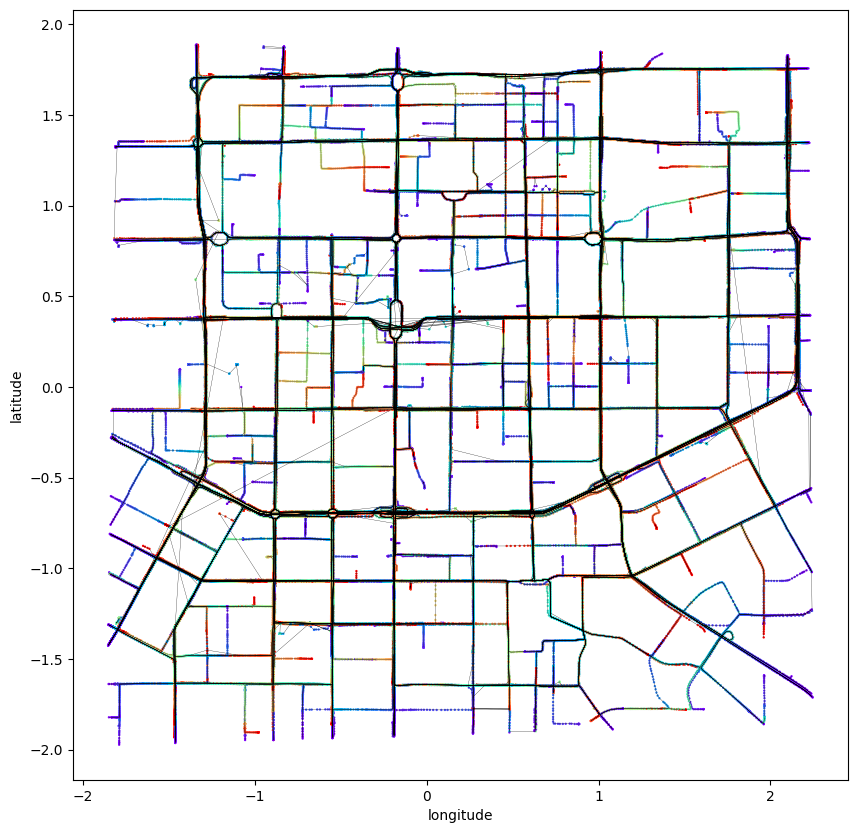

In [9]:
plt.figure(figsize=(10, 10))
for i in range(1000):
    lonlat, attr, times = dataset[i]
    visualizeTraj(lonlat, times)

In [7]:
diffusion_args = {
    "min_beta": 0.0001,
    "max_beta": 0.05,
    "max_diffusion_step": 500,
}

diffusion_manager = DiffusionManager(**diffusion_args)

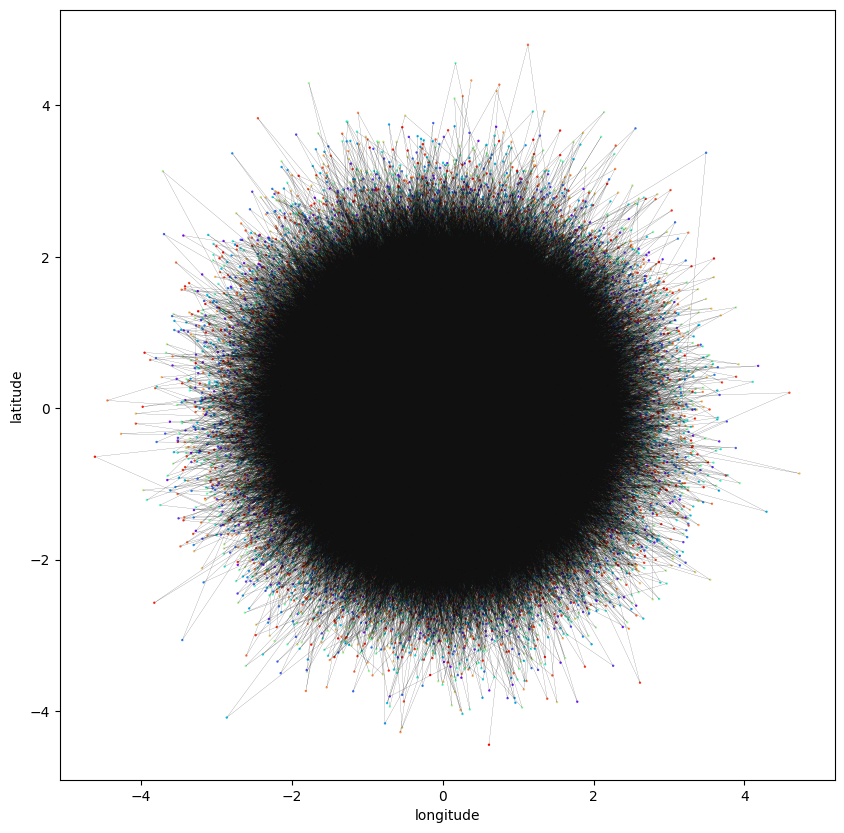

In [9]:
plt.figure(figsize=(10, 10))
time_step_tensor = torch.tensor([499]).cuda()
for i in range(1000):
    lonlat, attr, times = dataset[i]
    lonlat = lonlat.unsqueeze(0)
    noise = torch.randn_like(lonlat)
    lonlat = diffusion_manager.diffusionForward(lonlat, time_step_tensor, noise).squeeze(0)
    visualizeTraj(lonlat, times)